In [1]:
import os
import glob
import pandas as pd


In [2]:
#import the modules
import os
import pandas as pd
#read the path
file_path = "/Users/anitateladevalapalli/Documents/Big Data Analytics/Data"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['tweets_ondisaster.csv',
 'tweets_onnatural_disaster.csv',
 'News_on_disaster.csv',
 'News_on_earth quakes.csv',
 'DamnNatureYouScary1.csv',
 'News_on_natural disaster.csv',
 'DamnNatureYouScary.csv']

In [3]:
tweets_ondisaster_df = pd.read_csv('/Users/anitateladevalapalli/Documents/Big Data Analytics/Data/tweets_ondisaster.csv')

In [4]:
tweets_onnatural_disaster_df = pd.read_csv('/Users/anitateladevalapalli/Documents/Big Data Analytics/Data/tweets_onnatural_disaster.csv')

In [5]:
tweets_onnatural_disaster_df

,LABEL,Text
0,natural disaster,Battle weary: Armed forces feel the pinch as n...
1,natural disaster,has been declared in Malawi due to the natural...
2,natural disaster,and 16 people to go missing.\n\n According to ...
3,natural disaster,@1OreoSpeedwagon @SandraYozipovic I feel sad t...
4,natural disaster,"@josenava84 When it pops.. and it will, it wil..."
...,...,...
3424,earth quakes,@Chisommark To GOD BE ALL THE GLORY!! FATHER W...
3425,earth quakes,"🔮 The Earth experiences 50,000 Earth quakes pe..."
3426,earth quakes,@BeijingDai Whe do these islanders think China...
3427,earth quakes,Specific to Joe https://t.co/VcVhWm5eaj appear...


In [6]:
tweets_ondisaster_df.rename(columns={'LABEL':'Label'}, inplace = True)

In [7]:
tweets_ondisaster_df= tweets_ondisaster_df[['Text','Label']]


In [8]:
tweets_onnatural_disaster_df.rename(columns={'LABEL':'Label'}, inplace = True)

In [9]:
tweets_onnatural_disaster_df= tweets_onnatural_disaster_df[['Text','Label']]

In [10]:
News_on_natural_disaster_df = pd.read_csv('/Users/anitateladevalapalli/Documents/Big Data Analytics/Data/News_on_natural disaster.csv')

In [11]:
News_on_disaster_df = pd.read_csv('/Users/anitateladevalapalli/Documents/Big Data Analytics/Data/News_on_disaster.csv')

In [12]:
News_on_disaster_df.rename(columns= {'Description' : 'Text'}, inplace=True)

In [13]:
News_on_natural_disaster_df.rename(columns= {'Description' : 'Text'}, inplace=True)

In [14]:
News_on_natural_disaster_df

,Text,Label
0,"The men, including two teenagers, were saved a...",natural disaster
1,"Ten days after disaster, grief is being subsum...",natural disaster
2,The UN's delay in sending aid to Syrian victim...,natural disaster
3,“People usually don’t recover from disasters. ...,natural disaster
4,Senior politicians are urging the prime minist...,natural disaster
...,...,...
95,The Chinese embassy in France was slammed for ...,natural disaster
96,"Every four years when I was growing up, my\nmo...",natural disaster
97,Last month’s toxic train disaster in Ohio was ...,natural disaster
98,A special sporting event requires a special su...,natural disaster


In [15]:
DamnNatureYouScary1_df= pd.read_csv('/Users/anitateladevalapalli/Documents/Big Data Analytics/Data/DamnNatureYouScary1.csv')

In [16]:
DamnNatureYouScary1_df.rename(columns= {'Post' : 'Text'}, inplace=True)

In [17]:
DamnNatureYouScary_df= pd.read_csv('/Users/anitateladevalapalli/Documents/Big Data Analytics/Data/DamnNatureYouScary.csv')

In [18]:
DamnNatureYouScary_df.rename(columns= {'Post' : 'Text'}, inplace=True)

In [19]:
lst = [tweets_ondisaster_df,tweets_onnatural_disaster_df,News_on_natural_disaster_df,
                    News_on_disaster_df,DamnNatureYouScary1_df,DamnNatureYouScary_df]
df_main = pd.concat(lst)

In [20]:
df_main

,Text,Label
0,@NorthernDutch @Rep_Peltola That is very true....,disaster
1,@brownecfm @GerardoRiordan8 Exactly! We are pr...,disaster
2,Rhenus is proud to be putting #innovation to t...,disaster
3,@Justin_G0rd0n Complete disaster and it really...,disaster
4,He is so beautiful in the purple light despite...,disaster
...,...,...
95,When you ate too much,DamnNatureYouScary
96,Going for a dive,DamnNatureYouScary
97,What probably you didn't know about buffaloes....,DamnNatureYouScary
98,Amazing Time-lapse of Bees Hatching,DamnNatureYouScary


In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

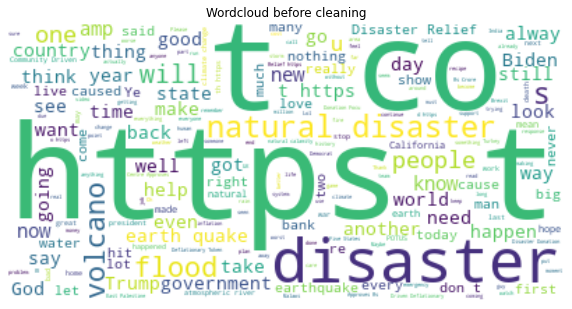

In [22]:
text = " ".join(i for i in df_main.Text)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud before cleaning')
plt.show()

## cleaning

In [23]:
#import packages
import requests  
import re  
import pandas as pd  

import numpy as np   
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer
#install and import tweepy package, An easy-to-use Python library for accessing the Twitter API.
import tweepy as tw
#Authentication is handled by the tweepy.AuthHandler class
from tweepy import OAuthHandler

from nltk.corpus import stopwords
from nltk import trigrams
import string
import nltk
from nltk.stem.porter import *
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
#removing patterns

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, ' ', input_txt)
    return input_txt   

In [25]:
# removing twitter handles (@user)
df_main['Text'] = np.vectorize(remove_pattern)(df_main['Text'], "@[\w]*#")
#removing urls    
df_main['Text'] = np.vectorize(remove_pattern)(df_main['Text'], "https?://[A-Za-z./]'*")

#removing special characters, numbers, punctuations
df_main['Text'] = df_main['Text'].str.replace("[^a-zA-Z]", " ")

df_main['Text'] = df_main['Text'].str.replace("https", "")
    #converting all the words to lowercase 
df_main['Text'] = df_main['Text'].str.lower()


#finally removing stopper words from the text column
stop = stopwords.words('english')
df_main['Text']= df_main['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]) )
#removing words of length lesser than 3 and greater  than 10 
df_main['Text'] = df_main['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3 and len(w)<15])) 

#changing all the words to lower case to make it easily readable and avoid messy representation of data

#removing meaningless words in the text column
#words = set(nltk.corpus.words.words())


#def clean_sent(sent):
 #   return " ".join(w for w in nltk.wordpunct_tokenize(sent)
  #   if w.lower() in words or not w.isalpha())



df_main['Text'] = df_main['Text'].astype(str).apply(lambda x: ''.join(x))


/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_90896/2783183899.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_main['Text'] = df_main['Text'].str.replace("[^a-zA-Z]", " ")


In [26]:
Stem_df = df_main.copy(deep=True)
#removing all rows in the Stem_df DataFrame where the value in the Headline column is an empty string.
Stem_df = Stem_df[Stem_df.Text!= '']
#creating a PorterStemmer object, which is a tool for stemming words.
A_STEMMER=PorterStemmer()
#performing stemming on each word in the Headline column of the Stem_df DataFrame.
Stem_df['Text'] = Stem_df['Text'].apply(lambda x: ' '.join([A_STEMMER.stem(word) for word in x.split()]))

print(Stem_df.head(10))
df_final = df_main[df_main.Text!= '']

                                                Text     Label
0  northerndutch peltola true like happen north s...  disaster
1      brownecfm gerardoriordan exactli prime disast  disaster
2  rhenu proud put innov test matter undertak sha...  disaster
3  justin complet disast realli pain rode subway ...  disaster
4  beauti purpl light despit disast besevboom tjn...  disaster
5  celebr march medicin physician healthcar worke...  disaster
6               trump crisi disast orangeturd jivkpn  disaster
7  trump intern relat disast presid biden catacly...  disaster
8  humzayousaf unmitig disast indi scotland zxios...  disaster
9  bitcoin trap open mani investor fall head stra...  disaster


In [27]:
lem_df = df_final.copy(deep=True)
lemmatizer = WordNetLemmatizer()    # Instantiate our Stemmer object
lem_df['Text'] = lem_df['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

lem_df = lem_df[lem_df.Text!= '']
print(lem_df.head(10))


df_final["Text"].values.tolist()
df_final.columns.values.tolist()

                                                Text     Label
0  northerndutch peltola true like happens north ...  disaster
1  brownecfm gerardoriordan exactly priming disaster  disaster
2  rhenus proud putting innovation test matter un...  disaster
3  justin complete disaster really pain rode subw...  disaster
4  beautiful purple light despite disaster besevb...  disaster
5  celebrate march medicine physician healthcare ...  disaster
6            trump crisis disaster orangeturd jivkpn  disaster
7  trump international relation disaster presiden...  disaster
8  humzayousaf unmitigated disaster indy scotland...  disaster
9  bitcoin trap open many investor falling headin...  disaster


['Text', 'Label']

In [28]:
#countvectorize to create words frequency array
mycv1 = CountVectorizer(input = 'content', stop_words = 'english')
mymat = mycv1.fit_transform(lem_df['Text'])
mycols = mycv1.get_feature_names()
mydf=pd.DataFrame(mymat.toarray(), columns = mycols)
print(mydf)
mydf.columns.values.tolist()

/Users/anitateladevalapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


      aaaaand  aabp  aada  aadesthe  aadhf  aadm  aaep  aagi  aago  \
0           0     0     0         0      0     0     0     0     0   
1           0     0     0         0      0     0     0     0     0   
2           0     0     0         0      0     0     0     0     0   
3           0     0     0         0      0     0     0     0     0   
4           0     0     0         0      0     0     0     0     0   
...       ...   ...   ...       ...    ...   ...   ...   ...   ...   
8815        0     0     0         0      0     0     0     0     0   
8816        0     0     0         0      0     0     0     0     0   
8817        0     0     0         0      0     0     0     0     0   
8818        0     0     0         0      0     0     0     0     0   
8819        0     0     0         0      0     0     0     0     0   

      aajkamrankhan  ...  zyqbk  zytmn  zyvnilssuy  zzbzj  zzfnd  zzkrrld  \
0                 0  ...      0      0           0      0      0        0   
1    

['aaaaand',
 'aabp',
 'aada',
 'aadesthe',
 'aadhf',
 'aadm',
 'aaep',
 'aagi',
 'aago',
 'aajkamrankhan',
 'aajtak',
 'aalamtab',
 'aang',
 'aaont',
 'aapda',
 'aark',
 'aaron',
 'aarondadon',
 'aaronjmate',
 'aaronrodgers',
 'aaronsibarium',
 'aaronstoner',
 'aarsityndt',
 'aarxaeensh',
 'aasjdpknab',
 'aasrjlvdn',
 'aathu',
 'aavishhkar',
 'aavom',
 'aaya',
 'aayi',
 'aaytxioezy',
 'abacaj',
 'abacha',
 'abadon',
 'abandon',
 'abandoned',
 'abandonment',
 'abati',
 'abatoni',
 'abbott',
 'abby',
 'abcaustralia',
 'abcnews',
 'abcpolitics',
 'abdicat',
 'abdicate',
 'abdikerm',
 'abdirahman',
 'abdoulie',
 'abduction',
 'abduiahii',
 'abdul',
 'abdulghani',
 'abdulmu',
 'abdulrehman',
 'abeg',
 'aberfan',
 'abfmrmn',
 'abgfle',
 'abgobwe',
 'abhaydeep',
 'abhdttyswn',
 'abhishbanerj',
 'abhorrent',
 'abigailthaw',
 'ability',
 'abiodun',
 'abiyahmedali',
 'abjkqslti',
 'able',
 'abolished',
 'abominatio',
 'abort',
 'abortion',
 'abou',
 'aboveitall',
 'abrantiekwaku',
 'abridgen',
 

In [29]:
vect = TfidfVectorizer(stop_words='english')

X = vect.fit_transform(lem_df.pop('Text')).toarray()

lem_df = pd.DataFrame(X, columns=vect.get_feature_names())
lem_df.columns.values.tolist()

/Users/anitateladevalapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaaaand',
 'aabp',
 'aada',
 'aadesthe',
 'aadhf',
 'aadm',
 'aaep',
 'aagi',
 'aago',
 'aajkamrankhan',
 'aajtak',
 'aalamtab',
 'aang',
 'aaont',
 'aapda',
 'aark',
 'aaron',
 'aarondadon',
 'aaronjmate',
 'aaronrodgers',
 'aaronsibarium',
 'aaronstoner',
 'aarsityndt',
 'aarxaeensh',
 'aasjdpknab',
 'aasrjlvdn',
 'aathu',
 'aavishhkar',
 'aavom',
 'aaya',
 'aayi',
 'aaytxioezy',
 'abacaj',
 'abacha',
 'abadon',
 'abandon',
 'abandoned',
 'abandonment',
 'abati',
 'abatoni',
 'abbott',
 'abby',
 'abcaustralia',
 'abcnews',
 'abcpolitics',
 'abdicat',
 'abdicate',
 'abdikerm',
 'abdirahman',
 'abdoulie',
 'abduction',
 'abduiahii',
 'abdul',
 'abdulghani',
 'abdulmu',
 'abdulrehman',
 'abeg',
 'aberfan',
 'abfmrmn',
 'abgfle',
 'abgobwe',
 'abhaydeep',
 'abhdttyswn',
 'abhishbanerj',
 'abhorrent',
 'abigailthaw',
 'ability',
 'abiodun',
 'abiyahmedali',
 'abjkqslti',
 'able',
 'abolished',
 'abominatio',
 'abort',
 'abortion',
 'abou',
 'aboveitall',
 'abrantiekwaku',
 'abridgen',
 

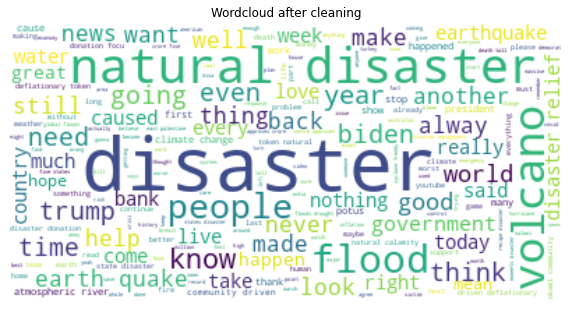

In [30]:
text = " ".join(i for i in df_final.Text)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud after cleaning')
plt.show()


In [31]:
df_new = df_final[['Text']]

In [32]:
df_new

,Text
0,northerndutch peltola true like happens north ...
1,brownecfm gerardoriordan exactly priming disaster
2,rhenus proud putting innovation test matters u...
3,justin complete disaster really pains rode sub...
4,beautiful purple light despite disaster besevb...
...,...
95,much
96,going dive
97,probably know buffaloes never forget harassed ...
98,amazing time lapse bees hatching


In [33]:
df_final.to_csv('Combined_cleaned_data.csv')

In [35]:

df_final['transaction'] = df_final['Text'].str.strip('()').str.split(' ')
#exploding the dataframe to create transaction based data

label = df_final['Label']


df_transaction= pd.DataFrame(df_final['transaction'].tolist())

#df_transaction.insert (0, label)
#some values had just '#' so removing it and replacing with 'None'
df_transaction.replace({'#': None},inplace =True, regex= True)
#removing index and column names from the data and storing it in a csv file
df_transaction.to_csv(r'/Users/anitateladevalapalli/Documents/Text Mining/transaction.csv',header=None,index=False)
#df_transaction.to_csv(r'/Users/anitateladevalapalli/Documents/Text Mining/transaction.csv',header=None,index=False)

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_90896/1182261576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['transaction'] = df_final['Text'].str.strip('()').str.split(' ')
